## 문제
- dc_airbnb.csv라는 데이터 프레임을 읽 습니다 dc_listings.
- print함수를 사용하여 의 첫 번째 행을 표시합니다 dc_listings.

In [39]:
import pandas as pd
dc_listings = pd.read_csv('dc_airbnb.csv')
print(dc_listings.iloc[0])

host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                              1
bathrooms                             1
beds                                  2
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                          38.89
longitude                      -77.0028
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object


In [40]:
dc_listings.shape

(3723, 19)

In [41]:
dc_listings.head(1)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC


## 문제 
- 3 명을 수용 할 수있는 생활 공간과 데이터 프레임의 첫 번째 생활 공간 사이의 유클리드 거리를 계산합니다 dc_listings.
- 함수를 first_distance사용하여 결과를 할당하고 값을 표시합니다 print.

In [42]:
import numpy as np
ab = 3
first = dc_listings.iloc[0]['accommodates']
first_distance = np.abs(ab - first)
print(first_distance)

1


## 문제
- accommodates열의 각 값과 값 사이의 거리를 계산합니다. dc_listings이 값 3은 목록에서 수용 할 수있는 사람 수입니다.
- 사용 apply의 각 값 사이의 절대 값을 계산하는 방법 accommodates과 3상기 거리 값을 포함하는 새로운 시리즈를 반환한다.
- distance열에 거리 값을 지정하십시오 .
- 시리즈 방법 value_counts과 print함수를 사용하여 distance열의 고유 한 값 수를 표시합니다 .

In [43]:
new = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(lambda x: np.abs(x - new))
print(dc_listings['distance'].value_counts())

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


## 문제
- 의 행 순서를 무작위로 지정합니다 dc_listings.
- np.random.permutation()함수를 사용하여 셔플 된 인덱스 값의 NumPy 배열을 반환합니다.
- loc[]셔플 된 순서를 포함하는 새 Dataframe을 반환 하려면 Dataframe 메서드 를 사용합니다 .
- 새 데이터 프레임을 dc_listings.
- 무작위 화 후 열을 기준으로 정렬 dc_listings하고에 distance다시 할당합니다 dc_listings.
- 함수를 price사용하여 열의 처음 10 개 값을 표시합니다 print.

In [44]:
np.random.seed(1)
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings = dc_listings.sort_values('distance')
print(dc_listings.iloc[0:10]['price'])

577     $185.00
2166    $180.00
3631    $175.00
71      $128.00
1011    $115.00
380     $219.00
943     $125.00
3107    $250.00
1499     $94.00
625     $150.00
Name: price, dtype: object


## 문제
- 열에서 쉼표 ( ,) 및 달러 기호 문자 ( $)를 제거하십시오 price.
- 사용 str우리는 문자열 방법 다음에 열의 각 값에 문자열 방법을 적용 할 수 있도록   빈 문자로 모든 쉼표 문자를 대체하는 접근을 바꾸기 :stripped_commas = dc_listings['price'].str.replace(',', '')
- 달러 기호 문자도 제거하려면 반복하십시오.
- 정리 된 값을 포함하는 새 Series 객체를 float데이터 유형으로 변환하고 의 price열에 다시 할당합니다 dc_listings.
- price열 에서 처음 5 개 값의 평균을 계산 하고에 할당합니다 mean_price.
print아래 의 함수 또는 변수 검사기를 사용하여 mean_price.

In [45]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)

156.6


## 문제
- predict_pricek- 최근 접 이웃 머신 러닝 기법을 사용하여에 대한 모든 값에 대해 제안 된 가격을 계산할 수 있는 함수를 작성합니다 accommodates. 이 기능은 다음과 같아야합니다.

- new_listing침실 수를 설명 하는 단일 매개 변수를 가져옵니다 .
- dc_listings라는 새 데이터 프레임에 할당 하는 코드를 추가했습니다 temp_df. 우리는 사용 pandas.DataFrame.copy () 기본 dataframe에 할당되도록 방법을 temp_df대신 그냥 참고로, dc_listings.
- accommodates열의 각 값 과 new_listing전달 된 값 사이의 거리를 계산합니다 . 결과 Series 객체를의 distance열에 할당합니다 temp_df.
- 열을 기준으로 정렬 temp_df하고 distance열에서 처음 5 개 값을 선택합니다 price. 의 순서를 무작위로 지정하지 마십시오 temp_df.
- 이 5 개 값의 평균을 계산하고이를 전체 predict_price함수 의 반환 값으로 사용 합니다.
- 이 predict_price기능을 사용하여 다음과 같은 생활 공간에 대한 가격을 제안 하십시오 .

- 1사람을 수용 하고 제안 된 가격을에 할당합니다 acc_one.
- 은 (는) 2사람들을 수용 하고 제안 된 가격을에 할당합니다 acc_two.
- 은 (는) 4사람들을 수용 하고 제안 된 가격을에 할당합니다 acc_four.

In [ ]:
dc_listings = pd.read_csv('dc_airbnb.csv')
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]

def predict_price(new_listing):
    temp_df = dc_listings.copy()
    ## Complete the function.
    return(new_listing)

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

## 문제
- numpy.random.permutation()함수를 사용하여 의 행 순서를 섞습니다 dc_listings.
- 처음 1862 개 행을 선택하고에 할당합니다 split_one.
- 나머지 1861 개 행을 선택하고에 할당합니다 split_two.

In [47]:
dc_listings = pd.read_csv("dc_airbnb.csv")
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
random = np.random.permutation(dc_listings.index)
dc_listings = dc_listings.reindex(random)

split_one = dc_listings.iloc[0:1862].copy()
split_two = dc_listings.iloc[1862:].copy()

## 문제
- 다음 auto과 같은 기본 알고리즘 ( )과 기본 이웃 수 ( 5)를 사용하여 k- 최근 접 이웃 모델을 훈련 시킵니다 .
- 의 accommodates열을 사용하여 train_one교육 및
에서 테스트합니다 test_one.
- 결과 RMSE 값을에 할당합니다 iteration_one_rmse.
- 다음 auto과 같은 기본 알고리즘 ( )과 기본 이웃 수 ( 5)를 사용하여 k- 최근 접 이웃 모델을 훈련 시킵니다 .
- 의 accommodates열을 사용하여 train_two교육 및
에서 테스트합니다 test_two.
- 결과 RMSE 값을에 할당합니다 iteration_two_rmse.
- 사용 numpy.mean()에 2 개 RMSE 값과 할당의 평균을 계산합니다 avg_rmse.

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one

model = KNeighborsRegressor()
model.fit(train_one[['accommodates']], train_one['price'])
test_one['predicted_price'] = model.predict(test_one[['accommodates']])
iteration_one_rmse = mean_squared_error(test_one['price'], test_one['predicted_price'])**(1/2)

model.fit(train_two[['accommodates']], train_two['price'])
test_two['predicted_price'] = model.predict(test_two[['accommodates']])
iteration_two_rmse = mean_squared_error(test_two['price'], test_two['predicted_price'])**(1/2)

avg_rmse = np.mean([iteration_one_rmse, iteration_two_rmse])

print(iteration_one_rmse, iteration_two_rmse, avg_rmse)

127.27344626271997 132.57677774728035 129.92511200500016


## 문제
- 각 행이 속한 접기 번호를 포함하는 dc_listingsnamed에 새 열을 추가합니다 fold.
- 접어 1인덱스에서 행이 있어야 0최대 745포함하지 않음을 745.
- 접어 2인덱스에서 행이 있어야 745최대 1490포함하지 않음을 1490.
- 접어 3인덱스에서 행이 있어야 1490최대 2234포함하지 않음을 2234.
- 접어 4인덱스에서 행이 있어야 2234최대 2978포함하지 않음을 2978.
- 접어 5인덱스에서 행이 있어야 2978최대 3723포함하지 않음을 3723.
- fold열에 대한 고유 값 개수를 표시하여 각 접기에 요소 수가 대략적으로 동일한 지 확인합니다.
- 누락 된 fold행이 없는지 확인하기 위해 열에 누락 된 값의 수를 표시합니다 .

In [55]:
dc_listings.loc[dc_listings.index[0:745], 'fold'] = 1
dc_listings.loc[dc_listings.index[745:1490], 'fold'] = 2
dc_listings.loc[dc_listings.index[1490:2234], 'fold'] = 3
dc_listings.loc[dc_listings.index[2234:2978], 'fold'] = 4
dc_listings.loc[dc_listings.index[2978:3723], 'fold'] = 5

print(dc_listings['fold'].value_counts())
print("누락 된 값의 수 :", dc_listings['fold'].isnull().sum())

5.0    745
2.0    745
1.0    745
4.0    744
3.0    744
Name: fold, dtype: int64
누락 된 값의 수 : 0


사용하여 K-가장 가까운 이웃 모델 기차 accommodates주름에서 유일한 기능으로 열 2을 5훈련 세트로합니다.
모델을 사용하여 테스트 세트 ( accommodates접힌 열 1)에 대한 예측을 수행하고 예측 레이블을에 할당합니다 labels.
price열을 예측 된 레이블과 비교하여 RMSE 값을 계산합니다 .
RMSE 값을에 할당합니다 iteration_one_rmse.

In [56]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor()
train_iteration_one = dc_listings[dc_listings["fold"] != 1]
test_iteration_one = dc_listings[dc_listings["fold"] == 1].copy()
model.fit(train_iteration_one[["accommodates"]], train_iteration_one["price"])

labels = model.predict(test_iteration_one[["accommodates"]])
test_iteration_one["predicted_price"] = labels
iteration_one_mse = mean_squared_error(test_iteration_one["price"], test_iteration_one["predicted_price"])
iteration_one_rmse = iteration_one_mse ** (1/2)

In [57]:
iteration_one_rmse

141.06019182647103

train_and_validate데이터 프레임을 첫 번째 매개 변수 ( df)로, 폴드 값 목록 ( 1이 5경우에는 to )을 두 번째 매개 변수 ( folds) 로 사용 하는 함수를 작성합니다 . 이 기능은 다음과 같아야합니다.

기차 n모델 (여기서 n주름의 수이다)와 (K 배하여 교차 검증을 수행 n폴드). 기본 사용 k가치 KNeighborsRegressor클래스를.
RMSE 값 목록을 반환합니다. 여기서 첫 번째 요소는 접기 1가 테스트 세트 일 때의 RMSE이고, 두 번째 요소는 접기 2가 테스트 세트 일 때의 RMSE입니다 .
train_and_validate함수를 사용하여 dc_listingsDataframe에 대한 RMSE 값 목록을 반환 하고에 할당합니다 rmses.

이 값의 평균을 계산하고에 할당합니다 avg_rmse.
모두 표시 rmses하고 avg_rmse.

In [58]:
# Use np.mean to calculate the mean.
import numpy as np
fold_ids = [1,2,3,4,5]
def train_and_validate(df, folds):
    fold_rmses = []
    for fold in folds:
        # Train
        model = KNeighborsRegressor()
        train = df[df["fold"] != fold]
        test = df[df["fold"] == fold].copy()
        model.fit(train[["accommodates"]], train["price"])
        # Predict
        labels = model.predict(test[["accommodates"]])
        test["predicted_price"] = labels
        mse = mean_squared_error(test["price"], test["predicted_price"])
        rmse = mse**(1/2)
        fold_rmses.append(rmse)
    return(fold_rmses)

rmses = train_and_validate(dc_listings, fold_ids)
print(rmses)
avg_rmse = np.mean(rmses)
print(avg_rmse)

[141.06019182647103, 121.3146165468921, 147.83474626859908, 129.84762865245813, 133.75555666811496]
134.76254799250708


KFold다음 속성 을 사용하여 클래스 의 새 인스턴스를 만듭니다 .

5 주름,
셔플이로 설정 됨 True,
임의의 시드 설정 1(동일한 시드를 사용하여 확인에 답할 수 있음)
변수에 할당됩니다 kf.
KNeighborsRegressor클래스 의 새 인스턴스를 만들고에 할당합니다 knn.

cross_val_score()함수를 사용하여 k- 겹 교차 검증을 수행합니다.

KNeighborsRegressor 인스턴스 사용 knn,
accommodates교육용 열을 사용하여
은 USING price대상 열로 열을
MSE 값의 배열을 반환합니다 (폴드마다 하나의 값).
MSE 값의 결과 목록을에 할당합니다 mses. 그런 다음 절대 값과 각 MSE 값의 제곱근을 가져옵니다. 그런 다음 결과 RMSE 값의 평균을 계산하고에 할당합니다 avg_rmse.

In [59]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(5, shuffle=True, random_state=1)
model = KNeighborsRegressor()
mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)

print(rmses)
print(avg_rmse)

[104.63459025 170.47761191 117.58890122 132.99210887 110.77106538]
127.2928555250945


In [60]:
from sklearn.model_selection import cross_val_score, KFold

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, dc_listings[["accommodates"]], dc_listings["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

3 folds:  avg RMSE:  129.90428443359949 std RMSE:  4.7029015855488705
5 folds:  avg RMSE:  127.2928555250945 std RMSE:  23.57090552538319
7 folds:  avg RMSE:  138.8254787100833 std RMSE:  25.966532627999783
9 folds:  avg RMSE:  126.03268200811314 std RMSE:  25.994136061402976
10 folds:  avg RMSE:  126.71998749180477 std RMSE:  34.918930856195274
11 folds:  avg RMSE:  127.81229498417237 std RMSE:  31.39255586453055
13 folds:  avg RMSE:  133.18323076144813 std RMSE:  36.67353767787447
15 folds:  avg RMSE:  131.44382851865646 std RMSE:  41.049699660644215
17 folds:  avg RMSE:  122.36003137127655 std RMSE:  40.2862102559604
19 folds:  avg RMSE:  123.79789641093899 std RMSE:  39.67425555274921
21 folds:  avg RMSE:  128.54025922391315 std RMSE:  40.86181406713698
23 folds:  avg RMSE:  124.03852575973475 std RMSE:  39.36723201728224


AmesHousing.txt탭 구분 기호 ( \t)를 사용하여 데이터 프레임을 읽고 에 할당합니다 data.
에서 첫 번째 1460행을 선택 data하고에 할당합니다 train.
에서 나머지 행을 선택 data하고에 할당합니다 test.
dataframe.info()방법을 사용하여 각 열에 대한 정보를 표시합니다.
각 열에 대해 자세히 알아 보려면 데이터 문서 를 읽으십시오 .
데이터 문서를 사용하여 예측하려는 대상 열을 결정합니다. 열 이름을에 문자열로 지정합니다 target.

In [62]:
import pandas as pd

a = pd.read_csv('AmesHousing.txt', sep = '\t')
a.head()

train = a.iloc[0:1461]
test = a.iloc[1460:]

train.info()

target = 'SalePrice'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1461 non-null   int64  
 1   PID              1461 non-null   int64  
 2   MS SubClass      1461 non-null   int64  
 3   MS Zoning        1461 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1461 non-null   int64  
 6   Street           1461 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1461 non-null   object 
 9   Land Contour     1461 non-null   object 
 10  Utilities        1461 non-null   object 
 11  Lot Config       1461 non-null   object 
 12  Land Slope       1461 non-null   object 
 13  Neighborhood     1461 non-null   object 
 14  Condition 1      1461 non-null   object 
 15  Condition 2      1461 non-null   object 
 16  Bldg Type        1461 non-null   object 
 17  House Style   

데이터를 탐색하려면 데이터 train프레임을 사용하여 플롯을 만듭니다 .

단일 열에 세 개의 산점도를 포함하는 치수가 7 x 15 인 Figure를 만듭니다.
첫 번째 플롯은 y 축의 열에 Garage Area대해 x 축의 열을 플로팅해야합니다 SalePrice.
두 번째 는 y 축의 열에 Gr Liv Area대해 x 축의 열을 플로팅해야합니다 SalePrice.
세 번째 Overall Cond는 x 축의 SalePrice열을 y 축의 열에 대해 플로팅해야합니다 .
데이터 문서 에서이 3 개 열에 대해 자세히 알아보세요 .

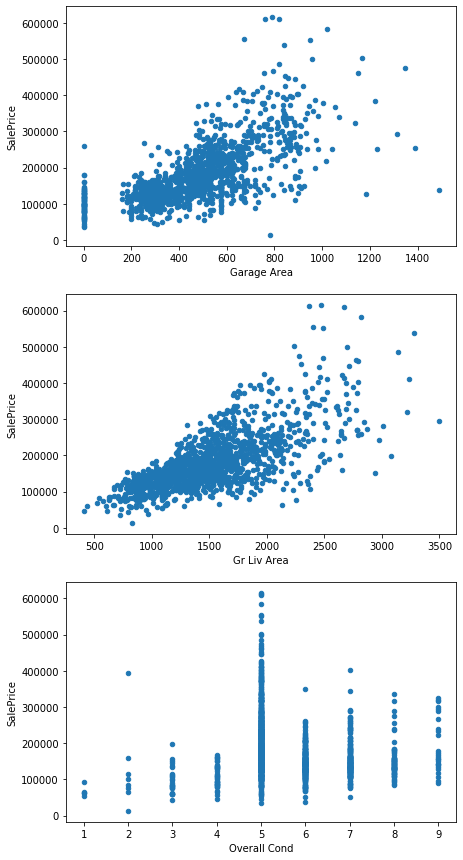

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,15))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

train.plot(x="Garage Area", y="SalePrice", ax=ax1, kind="scatter")
train.plot(x="Gr Liv Area", y="SalePrice", ax=ax2, kind="scatter")
train.plot(x="Overall Cond", y="SalePrice", ax=ax3, kind="scatter")

plt.show()

선형 회귀 모델을 가져오고 인스턴스화합니다.
가격을 예측하기 위해 최상의 기능을 사용하는 선형 회귀 모델을 적합합니다. 기본 인수를 사용합니다 .
coef_및 intercept_속성을 사용하여 피팅 된 모델의 계수와 절편을 표시 합니다.
Assign a1 to a1 and a0 to a0

In [64]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
print(lr.coef_)
print(lr.intercept_)

a0 = lr.intercept_
a1 = lr.coef_

[116.92461444]
5307.908448440809


적합 모델을 사용하여 훈련 세트와 테스트 세트 모두에 대해 예측합니다.
훈련 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 train_rmse.
테스트 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 test_rmse.

In [65]:
import numpy as np

lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

56025.48502868523
57090.79429669655


의 열을 사용하여 선형 회귀 모델을 훈련시킵니다 cols.
피팅 된 모델을 사용하여 훈련 및 테스트 데이터 세트 모두에 대해 예측합니다.
훈련 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 train_rmse_2.
테스트 세트의 예측에 대한 RMSE 값을 계산하고에 할당합니다 test_rmse_2.

In [66]:
cols = ['Overall Cond', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print(train_rmse_2)
print(test_rmse_2)

56023.43045249407
57068.982233394214


admissions.csv라는 데이터 프레임을 읽 습니다 admissions.
Matplotlib 메서드 scatter 를 사용하여 다음을 사용하여 산점도 를 생성합니다.
gpa x 축의 열.
admit y 축의 열.
plt.show()산점도를 표시하는 데 사용 합니다.

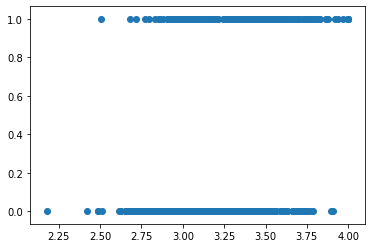

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
admissions = pd.read_csv('admissions.csv')
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

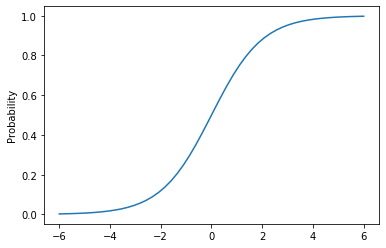

In [69]:
import numpy as np

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

LogisticRegression 클래스를 가져 오고 이름이 logistic_model.
LogisticRegression 방법 fit을 사용하여 모델을 데이터에 맞 춥니 다. 우리는 gpa값을 사용하여 값을 예측 하는 모델을 구성하는 데에만 관심이 admit있습니다.
문제 가 발생하면 LogisticRegression 클래스에 대한 설명서를 참조하십시오 .

In [ ]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions['gpa'],admissions['admit'])

In [71]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression()

LogisticRegression 메서드 predict_proba를 사용하여 gpa열의 데이터에 대한 예측 확률을 반환합니다 . 반환 된 확률을에 할당합니다 pred_probs.

Matplotlib scatter함수를 사용하여 산점도를 만들고 표시합니다 .

x 축은 gpa열의 값입니다.
y 축은 label로 분류 될 확률입니다 1.

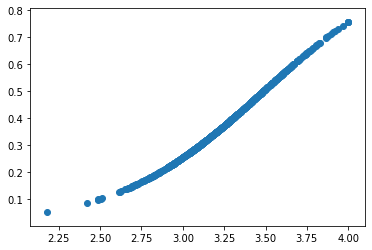

In [72]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])

LogisticRegression 메서드predict 를 사용하여 훈련 세트의 각 레이블에 대한 예측값을 반환합니다.

predict메소드 의 매개 변수는 메소드 의 매개 변수 와 일치합니다 predict_proba.
X: 예측에 사용할 데이터 행입니다.
결과를에 할당합니다 fitted_labels.
Matplotlib scatter함수를 사용하여 산점도를 만들고 표시합니다 .

x 축은 gpa열의 값입니다.
y 축은 fitted_labels

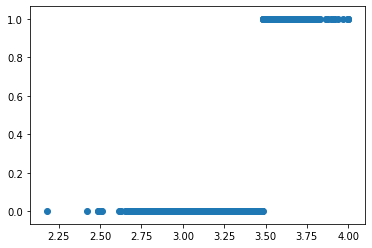

In [74]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa']], admissions['admit'])
fitted_labels = logistic_model.predict(admissions[['gpa']])
plt.scatter(admissions['gpa'], fitted_labels)